In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,8
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv(r"E:\10.python\Time Series\sales of shampoo.csv")

df.loc[:11,"Month"]=df.loc[:11,"Month"].apply(lambda x:"01"+x[2:6]+"-"+str(15))
df.loc[12:23,"Month"]=df.loc[12:23,"Month"].apply(lambda x:"01"+x[2:6]+"-"+str(16))
df.loc[24:,"Month"]=df.loc[:,"Month"].apply(lambda x:"01"+x[2:6]+"-"+str(17))
df

,Month,Sales of shampoo over a three year period
0,01-Jan-15,266.0
1,01-Feb-15,145.9
2,01-Mar-15,183.1
3,01-Apr-15,119.3
4,01-May-15,180.3
5,01-Jun-15,168.5
6,01-Jul-15,231.8
7,01-Aug-15,224.5
8,01-Sep-15,192.8
9,01-Oct-15,122.9


<AxesSubplot:>

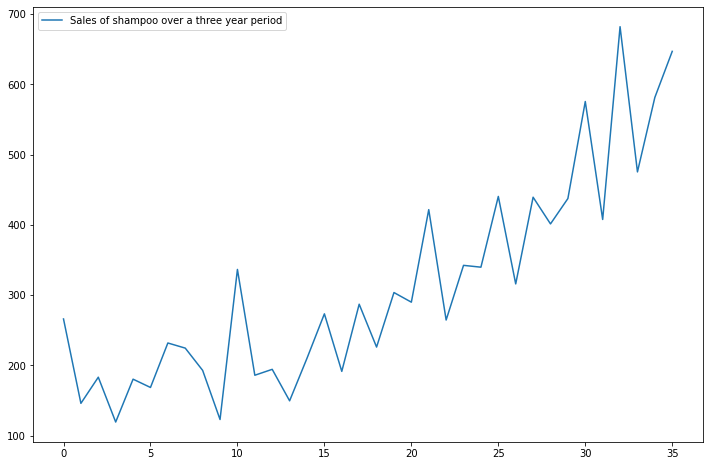

In [69]:
df.plot()

In [70]:
Month_data = df.resample('M', on='Month').sum()
Month_data.head(10)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [71]:
df["Month"]=pd.to_datetime(df["Month"],format="%d-%b-%y")

In [72]:
df.sort_values("Month")

,Month,Sales of shampoo over a three year period
0,2015-01-01,266.0
1,2015-02-01,145.9
2,2015-03-01,183.1
3,2015-04-01,119.3
4,2015-05-01,180.3
5,2015-06-01,168.5
6,2015-07-01,231.8
7,2015-08-01,224.5
8,2015-09-01,192.8
9,2015-10-01,122.9


In [73]:
df.set_index("Month",inplace=True)

<AxesSubplot:xlabel='Month'>

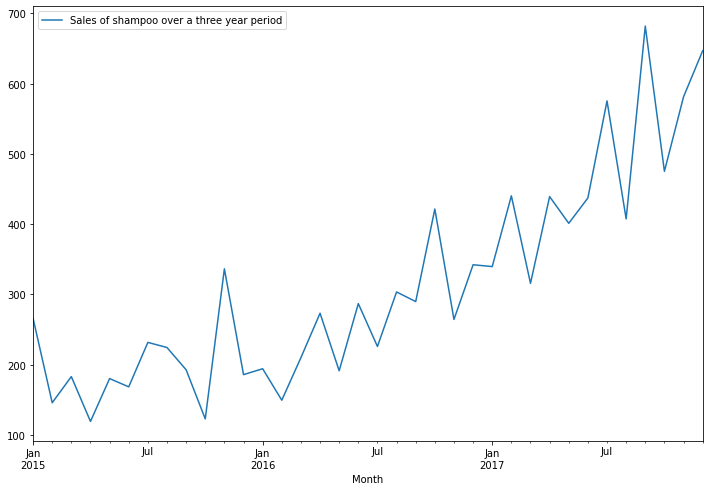

In [74]:
df.plot()

In [75]:
df.columns=["Sales"]

p-value = 1.7998574141687034e-10 The series is likely stationary.
shift value :: 1
Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


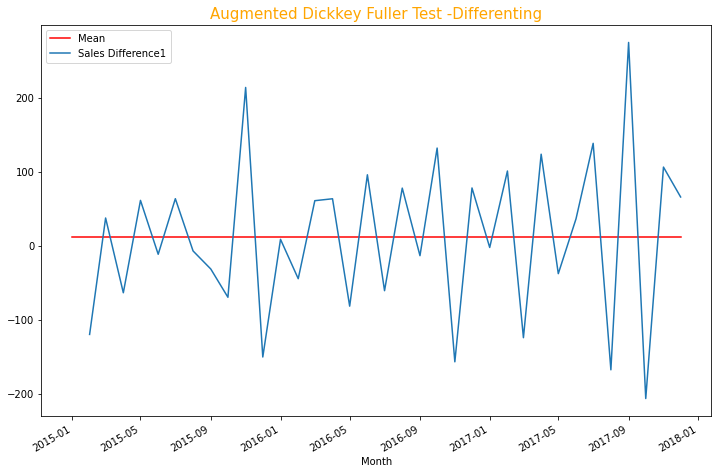

In [76]:
def Differencing(df,target,cutoff=0.05,shift=30):
    df1=df.copy()
    from statsmodels.tsa.stattools import adfuller
    for i in range(1,shift):
        df1['Sales Difference'+str(i)] = df1[target] - df1[target].shift(i)
        result=adfuller(df1['Sales Difference'+str(i)].dropna())
        df1["mean"] = df1['Sales Difference'+str(i)].mean()
        dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in result[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        pvalue = result[1]
        if pvalue < cutoff:
            print(f'p-value = {pvalue} The series is likely stationary.')
            print("shift value ::",i)
            print(dfoutput)
            mean = plt.plot(df1["mean"] , color='red', label='Mean')
            df1['Sales Difference'+str(i)].plot()
            plt.title("Augmented Dickkey Fuller Test -Differenting",size=15,color="Orange")
            plt.legend()
#             print(df1)
            break
        else:
            pass
    else:
        print(f'p-value = {pvalue} The series is likely non-stationary.')
Differencing(df,"Sales") 

In [77]:
def Differencing(df,target,cutoff=0.05,window=30):
    df1=df.copy()
    from statsmodels.tsa.stattools import adfuller
    for i in range(1,window):
        df1['roll_mean'+str(i)] = df1[target].rolling(window=i).mean()
        result=adfuller(df1['roll_mean'+str(i)].dropna())
#         df1["rolmean"] = df1['roll_mean'+str(i)].mean()
        rolmean = df1['roll_mean'+str(i)].rolling(window=i).mean()
        rolstd = df1['roll_mean'+str(i)].rolling(window=i).std()
        dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in result[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        pvalue = result[1]
        if pvalue < cutoff:
            print(f'p-value = {pvalue} The series is likely stationary.')
            print(dfoutput)
#             print(df1)
            plt.figure(figsize=(10,5))
            mean = plt.plot(rolmean, color='red', label='Rolling Mean')
            std = plt.plot(rolstd, color='green', label='Rolling std')
            plt.title("Augmented Dickkey Fuller Test -Rolling Mean",size=15,color="Orange")
            df1['roll_mean'+str(i)].plot()
            plt.legend()
            print(df1)
            break
        else:
            pass
    else:
        if window<=1:
            print(f'window value put always greater than 1')
        else:
            print(f'p-value = {pvalue} The series is likely non-stationary.')
        
Differencing(df,"Sales",window=20)   

p-value = 0.9988883994897202 The series is likely non-stationary.


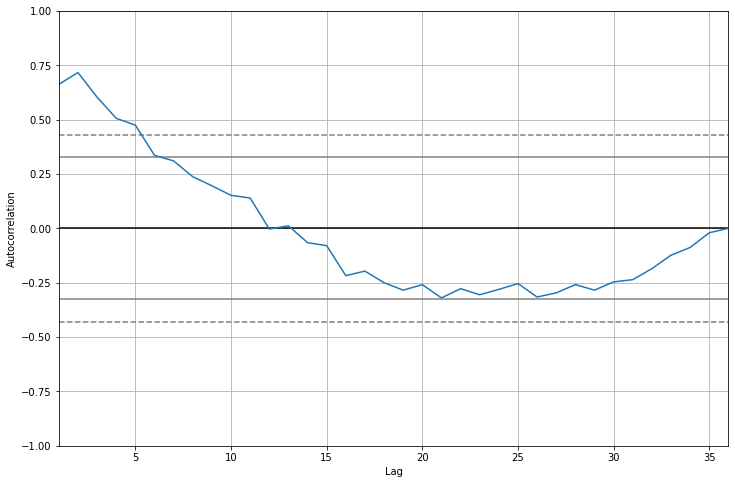

In [78]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [79]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [80]:
df['Seasonal First Difference']=df["Sales"] - df["Sales"].shift(1)

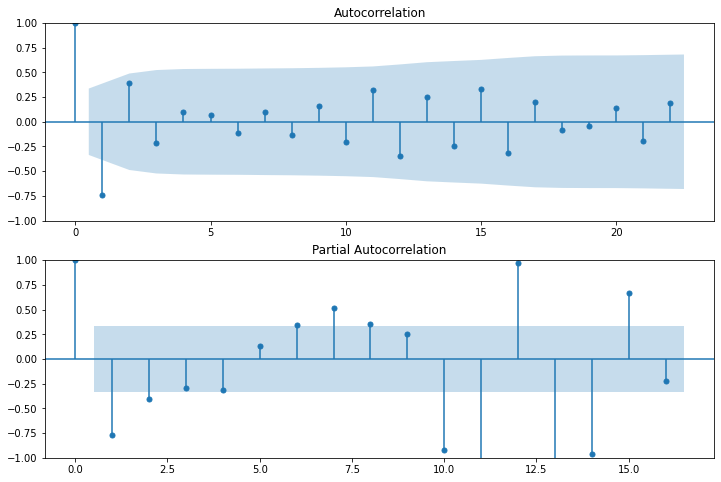

In [81]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[2:],lags=22,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[2:],lags=16,ax=ax2)

In [82]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA 

In [83]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                Sun, 01 May 2022   AIC                            406.782
Time:                        14:11:24   BIC                            411.448
Sample:                    01-01-2015   HQIC                           408.393
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0426   1386.817      3.881      0.000    2663.931    8100.154
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.46   Prob(JB):                         0.45
Heteroskedasticity (H):               1.62   Skew:                             0.43
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Month'>

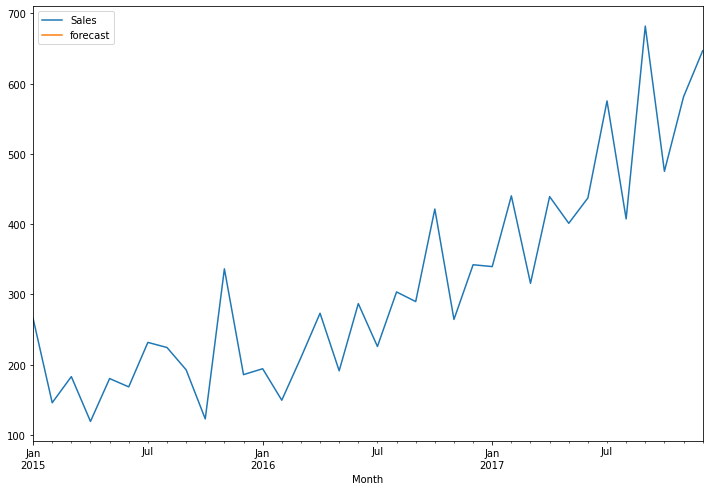

In [85]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

# SARIMAX

In [86]:
import statsmodels.api as sm

In [87]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
results1=model.fit()

C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

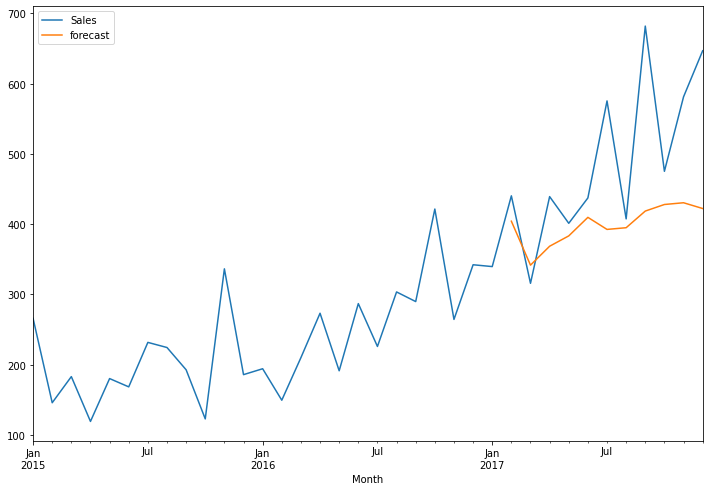

In [88]:
df['forecast']=results1.predict(start=25,end=35,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [97]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [98]:
future_dates[1:]

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00')]

In [99]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [100]:
future_df=pd.concat([df,future_datest_df])
future_df

,Sales,Seasonal First Difference,forecast
2015-01-01,266.0,NaN,NaN
2015-02-01,145.9,-120.1,NaN
2015-03-01,183.1,37.2,NaN
2015-04-01,119.3,-63.8,NaN
2015-05-01,180.3,61.0,NaN
2015-06-01,168.5,-11.8,NaN
2015-07-01,231.8,63.3,NaN
2015-08-01,224.5,-7.3,NaN
2015-09-01,192.8,-31.7,NaN
2015-10-01,122.9,-69.9,NaN


In [101]:
# future_df['forecast'] = results.predict(start =25,end = 83,dynamic= True)  
# future_df[['Sales', 'forecast']].iloc[20,:].plot(figsize=(12, 8)) 

<AxesSubplot:>

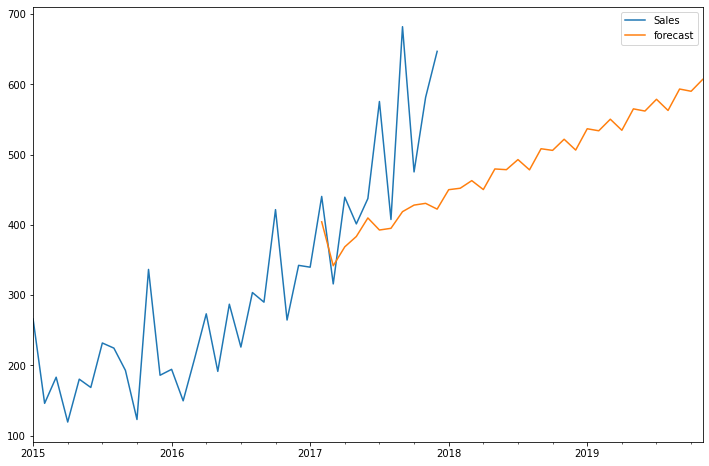

In [102]:
future_df['forecast']=results1.predict(start=25,end=200,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))
# future_df[['Sales','forecast']].plot(figsize=(12, 8))